# 1. Linear Regression
### 공부 시간에 따른 시험 점수

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [45]:
X = dataset.iloc[:, :-1].values # iloc[row, col]
# row는 모든 row 선택
# :-1 --> col은 score을 제외한 모든 col 선택 -> 지금은 독립변수가 hour 1개이지만
# 독립변수가 매우 많은 데이터를 다룰때도 똑같이 사용가능 (종속변수를 제외한 모든 col)
Y = dataset.iloc[:, -1].values # -1 --> 마지막 데이터(종속변수인 score) col
X, Y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [46]:
from sklearn.linear_model import LinearRegression # 선형회귀 클래스를 사용하겠다
reg = LinearRegression() # 객체 생성
reg.fit(X, Y) # fit --> 학습을 시키는 함수

LinearRegression()

In [47]:
Y_pred = reg.predict(X) # X에 대한 예측 값(추정치)
Y_pred 

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

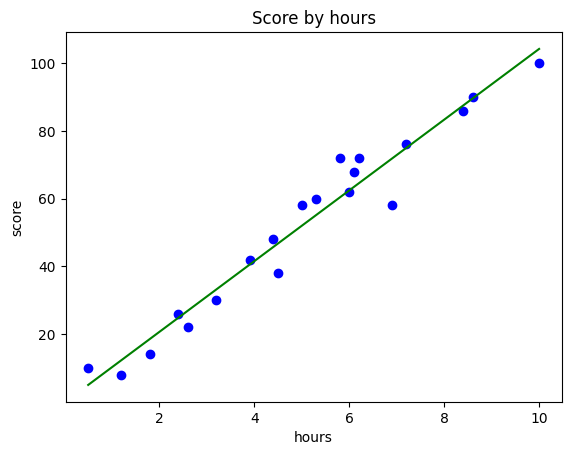

In [48]:
plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='green')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [49]:
print('9시간 공부했을 때 예상 점수 : ', reg.predict([[9]])) # 데이터가 2차원 배열이므로 [[]]

9시간 공부했을 때 예상 점수 :  [93.77478776]


In [50]:
print('9시간, 8시간, 7시간 공부했을 때 예상 점수 : ', reg.predict([[9], [8], [7]]))

9시간, 8시간, 7시간 공부했을 때 예상 점수 :  [93.77478776 83.33109082 72.88739388]


In [51]:
reg.coef_ # 기울기 (m)

array([10.44369694])

In [52]:
reg.intercept_ # y 절편 (b)

-0.218484702867201

### 데이터 세트 분리

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [54]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

In [55]:
from sklearn.model_selection import train_test_split
# 훈련용과 테스트용으로 데이터를 분리시키는 모듈
# 4개의 값을 튜플 형태로 반환함
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) # 8:2로 분리
# random_state=0 는 강의영상 코드와 수강생 코드의 random 값이 같도록 설정함

In [56]:
X, len(X) # 전체 데이터 X, 개수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [57]:
X_train, len(X_train) # 훈련 세트 X, 개수

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [58]:
X_test, len(X_test) # 테스트 세트 X, 개수

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [59]:
Y_train, len(Y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [60]:
Y_test, len(Y_test)

(array([ 90,   8, 100,  38], dtype=int64), 4)

### 분리된 데이터를 통한 모델링

In [61]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [62]:
reg.fit(X_train, Y_train) # 훈련 세트로 학습

LinearRegression()

### 데이터 시각화(훈련 세트)

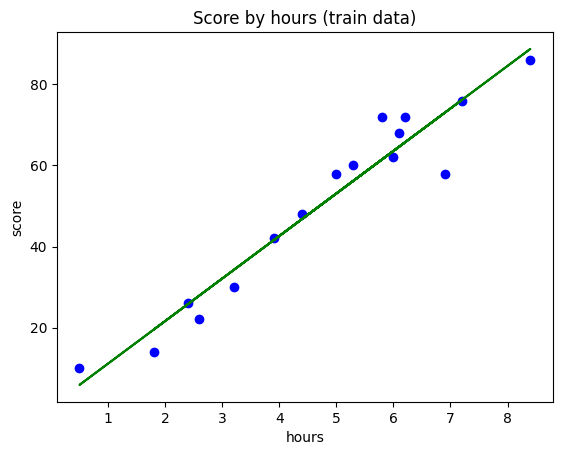

In [64]:
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Score by hours (train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (테스트 세트)

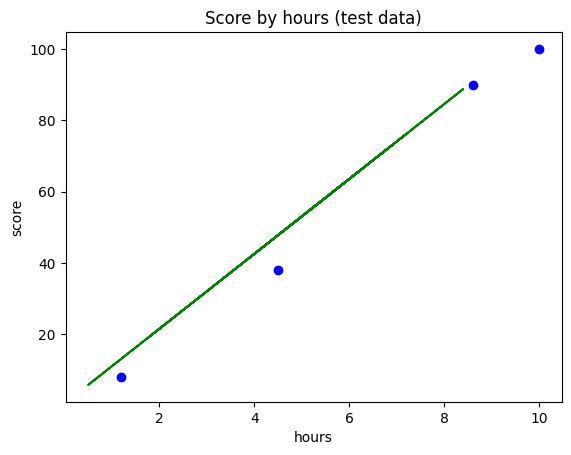

In [65]:
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green') # 회귀선은 훈련 데이터로 만든것을 유지
plt.title('Score by hours (test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [66]:
reg.coef_

array([10.49161294])

In [67]:
reg.intercept_

0.6115562905169369

### 모델 평가

In [68]:
reg.score(X_test, Y_test) # 테스트 세트를 통한 모델 평가 --> 약 97점

0.9727616474310156

In [69]:
reg.score(X_train, Y_train) # 훈련 세트를 통한 모델 평가 --> 약 94

0.9356663661221668

## 경사 하강법 (Gradient Descent)

In [70]:
from sklearn.linear_model import SGDRegressor
# SGD : Stochastic Gradient Descent 확률적 경사 하강법
sr = SGDRegressor()
sr.fit(X_train, Y_train)

SGDRegressor()

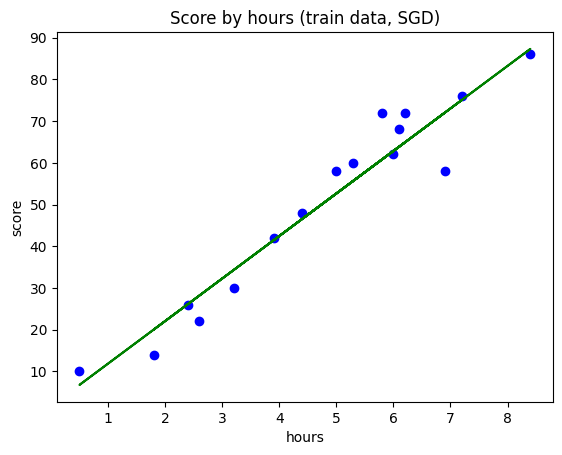

In [71]:
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X_train, sr.predict(X_train), color='green')
plt.title('Score by hours (train data, SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [72]:
sr.coef_

array([10.19698123])

In [73]:
sr.intercept_

array([1.64748875])

In [74]:
sr.score(X_test, Y_test)

0.9755394675638216

In [75]:
sr.score(X_train,Y_train)

0.9346830903062145

In [91]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=1) 
# max_iter -> 반복(iteration) 횟수, eta0 -> 학습률 (default 0.01), verbose -> 각 epoch마다 출력 (진행상황 모니터링)
# 적은 max_iter와 낮은 eta0를 설정하면 최적화가 되기 전에 학습이 끝날 우려
sr.fit(X_train, Y_train)
# 지수 표기법
# 1e-3 : 0.001

-- Epoch 1
Norm: 0.27, NNZs: 1, Bias: 0.048869, T: 16, Avg. loss: 1484.241876
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 1, Bias: 0.083896, T: 32, Avg. loss: 1419.741822
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.114272, T: 48, Avg. loss: 1367.983092
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.79, NNZs: 1, Bias: 0.141552, T: 64, Avg. loss: 1322.870279
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 1, Bias: 0.166772, T: 80, Avg. loss: 1282.550224
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.190476, T: 96, Avg. loss: 1245.587071
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 0.212877, T: 112, Avg. loss: 1211.227118
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.32, NNZs: 1, Bias: 0.234194, T: 128, Avg. loss: 1179.037565
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.43, NNZs: 1, Bias: 0.254556, T: 144, Avg. loss: 1148.814106
Total training 

C:\Users\its\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=200, random_state=0, verbose=1)

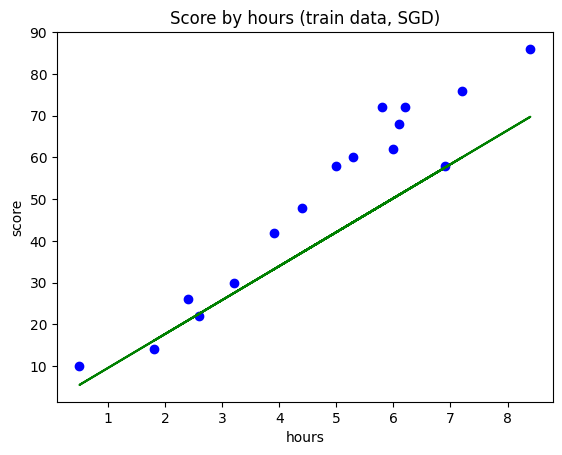

In [92]:
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X_train, sr.predict(X_train), color='green')
plt.title('Score by hours (train data, SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()